In [1]:
import numpy as np
import pandas as pd
from scapy.all import *
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models import Doc2Vec
from sklearn import utils
from sklearn.model_selection import train_test_split
import gensim
from sklearn.linear_model import LogisticRegression
from gensim.models.doc2vec import TaggedDocument

In [2]:
pcap_file1='/home/rutwikk/NetworkML/one_sample_pcap/def.pcap'
pcap_file2='/home/rutwikk/NetworkML/one_sample_pcap/abc.pcap'
pcap_file3= '/home/rutwikk/NetworkML/one_sample_pcap/13332500500846625594_malware_adload.pcap'

In [3]:
def get_header(pcap_file):
    raw_file=pcap_file.encode('utf-8')
    hex_file=raw_file.hex()
    return hex_file

In [4]:
hex1 = get_header(pcap_file1)
hex1

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f6f6e655f73616d706c655f706361702f6465662e70636170'

In [5]:
def pcap_2_hex(pcap_file):
    scapy_cap = rdpcap(pcap_file)
    file_string=""
    file_string+= get_header(pcap_file)
    for packet in scapy_cap:
        raw_packet=raw(packet)
        hex_packet= str(s.hex())
        for x in range(len(hex_packet)):
                char_gram=hex_packet[x:x+10]
                file_string+=char_gram
                file_string+="    "
    return file_string

In [6]:
dataframe_pcap=pd.read_csv("pcap2vec_ids.csv")

In [7]:
display(dataframe_pcap.head())

,File,Label
0,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_port-scan
1,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,benign_benign
2,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_dos
3,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,benign_benign
4,2f686f6d652f72757477696b6b2f4e6574776f726b4d4c...,malware_ddos


In [8]:
dataframe_pcap['File'][2]

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f646174615f706361705f6964732f6964735f73616d706c655f31306b2f373536363339313233373537333732313231355f6d616c776172655f646f732e706361700019b90a69    019b90a69f    19b90a69f1    9b90a69f10    b90a69f100    90a69f100c    0a69f100c1    a69f100c1b    69f100c1b1    9f100c1b11    f100c1b114    100c1b114e    00c1b114eb    0c1b114eb3    c1b114eb31    1b114eb310    b114eb3108    114eb31080    14eb310800    4eb3108004    eb31080045    b310800450    3108004500    1080045000    0800450000    8004500003    004500003c    04500003c7    4500003c78    500003c783    00003c7832    0003c78324    003c783240    03c7832400    3c78324000    c783240003    783240003e    83240003e0    3240003e06    240003e064    40003e064d    0003e064d9    003e064d9e    03e064d9ea    3e064d9eac    e064d9eac1    064d9eac10    64d9eac100    4d9eac1000    d9eac10000    9eac100001    eac100001c    ac100001c0    c100001c0a    100001c0a8    00001c0a80    0001c0a80a    001c0a80a3    01c0a80a3

In [9]:
dataframe_pcap['File'][1]

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f646174615f706361705f6964732f6964735f73616d706c655f31306b2f3133303338393133383436393433303933305f62656e69676e5f62656e69676e2e7063617000c1b114eb    0c1b114eb3    c1b114eb31    1b114eb310    b114eb3100    114eb31002    14eb310023    4eb310023a    eb310023ae    b310023ae9    310023ae9b    10023ae9ba    0023ae9bad    023ae9badb    23ae9badb3    3ae9badb30    ae9badb308    e9badb3080    9badb30800    badb308004    adb3080045    db30800450    b308004500    3080045000    0800450000    8004500003    004500003c    04500003c7    4500003c78    500003c783    00003c783e    0003c783e4    003c783e40    03c783e400    3c783e4000    c783e40004    783e400040    83e4000400    3e40004006    e400040064    4000400643    000400643e    00400643e3    0400643e3c    400643e3c0    00643e3c0a    0643e3c0a8    643e3c0a80    43e3c0a80a    3e3c0a80a1    e3c0a80a13    3c0a80a13a    c0a80a13ac    0a80a13acd    a80a13acd9    80a13acd90    0a13acd907    a13acd9070    13acd90

In [10]:
dataframe_pcap['File'].apply(lambda x: len(x.split(' '))).sum()

209674504

In [11]:
df= dataframe_pcap

In [12]:
from bs4 import BeautifulSoup
def cleanText(text):
    #text = BeautifulSoup(text, "lxml").text
    text = re.sub(r'\|\|\|', r' ', text) 
    return text
df['File'] = df['File'].apply(cleanText)
display(df['File'][0])

'2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f646174615f706361705f6964732f6964735f73616d706c655f31306b2f393035363634303033303233333330333335395f6d616c776172655f706f72742d7363616e2e706361700019b90a69    019b90a69f    19b90a69f1    9b90a69f10    b90a69f100    90a69f100c    0a69f100c1    a69f100c1b    69f100c1b1    9f100c1b11    f100c1b114    100c1b114e    00c1b114eb    0c1b114eb3    c1b114eb31    1b114eb310    b114eb3108    114eb31080    14eb310800    4eb3108004    eb31080045    b310800450    3108004500    1080045000    0800450000    8004500002    004500002c    04500002c5    4500002c51    500002c514    00002c5143    0002c51430    002c514300    02c5143000    2c51430000    c514300003    5143000031    1430000310    4300003106    300003106c    00003106c1    0003106c19    003106c19d    03106c19da    3106c19dac    106c19dac1    06c19dac10    6c19dac100    c19dac1000    19dac10000    9dac100001    dac100001c    ac100001c0    c100001c0a    100001c0a8    00001c0a80    0001c0a80a    001c0a80a3 

In [13]:
train, test = train_test_split(df, test_size=0.3, random_state=42)
import nltk


In [17]:
def tokenize_text(text):
    tokens = []
    for sent in nltk.sent_tokenize(text):
        for word in nltk.word_tokenize(sent):
            if(len(word)>2):
                tokens.append(word.lower())
    return tokens
train_tagged = train.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['File']), tags=[r.Label]), axis=1)
test_tagged = test.apply(
    lambda r: TaggedDocument(words=tokenize_text(r['File']), tags=[r.Label]), axis=1)

In [15]:
train_tagged.values[1]

TaggedDocument(words=['2f686f6d652f72757477696b6b2f4e6574776f726b4d4c2f646174615f706361705f6964732f6964735f73616d706c655f31306b2f31323534323031393435323236303330303438385f6d616c776172655f696e66696c74726174696f6e2e70636170b8ac6f360b', '8ac6f360ba', 'ac6f360ba8', 'c6f360ba8b', '6f360ba8b8', 'f360ba8b8a', '360ba8b8ac', '60ba8b8ac6', '0ba8b8ac6f', 'ba8b8ac6f3', 'a8b8ac6f36', '8b8ac6f360', 'b8ac6f3608', '8ac6f3608f', 'ac6f3608f5', 'c6f3608f50', '6f3608f508', 'f3608f5080', '3608f50800', '608f508004', '08f5080045', '8f50800450', 'f508004500', '5080045000', '0800450000', '8004500002', '004500002c', '04500002cd', '4500002cd6', '500002cd6d', '00002cd6de', '0002cd6de0', '002cd6de00', '02cd6de000', '2cd6de0000', 'cd6de00002', 'd6de00002f', '6de00002f0', 'de00002f06', 'e00002f061', '00002f061f', '0002f061f6', '002f061f62', '02f061f62c', '2f061f62c0', 'f061f62c0a', '061f62c0a8', '61f62c0a80', '1f62c0a80a', 'f62c0a80a0', '62c0a80a08', '2c0a80a08c', 'c0a80a08c0', '0a80a08c0a', 'a80a08c0a8', '80a08c0a8

In [16]:
import multiprocessing
cores = multiprocessing.cpu_count()
cores

8

In [18]:
model_dbow = Doc2Vec(dm=0, vector_size=300, negative=5, hs=0, min_count=2, sample = 0, workers=cores)
model_dbow.build_vocab([x for x in tqdm(train_tagged.values)])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 3310421.47it/s]


In [19]:
for epoch in range(1):
    model_dbow.train(utils.shuffle([x for x in tqdm(train_tagged.values)]), total_examples=len(train_tagged.values), epochs=40)
    model_dbow.alpha -= 0.002
    model_dbow.min_alpha = model_dbow.alpha

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7000/7000 [00:00<00:00, 3529285.73it/s]


In [20]:
def vec_for_learning(model, tagged_docs):
    sents = tagged_docs.values
    targets, regressors = zip(*[(doc.tags[0], model.infer_vector(doc.words)) for doc in sents])
    return targets, regressors

In [23]:
y_train, X_train = vec_for_learning(model_dbow, train_tagged)
y_test, X_test = vec_for_learning(model_dbow, test_tagged)

In [ ]:
print(X_)

In [47]:
logreg = LogisticRegression(n_jobs=1, C=1e5)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [48]:
from sklearn import metrics
score = metrics.accuracy_score(y_test, y_pred)
print(score)

0.9923333333333333


In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
score = metrics.accuracy_score(y_pred, y_test)
print(score)

0.6076666666666667


In [50]:
from sklearn import svm
svm_clf = svm.SVC(gamma='auto', max_iter=100)
svm_clf.fit(X_train, y_train)
predicted = svm_clf.predict(X_test)

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


In [51]:
print(
    f"Classification report for classifier {svm_clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)
metrics.accuracy_score(y_test,predicted)

Classification report for classifier SVC(gamma='auto', max_iter=100):
                      precision    recall  f1-score   support

       benign_benign       0.99      1.00      0.99      1324
        malware_ddos       1.00      1.00      1.00       272
         malware_dos       0.95      1.00      0.98       145
 malware_ftp-patator       1.00      0.93      0.96        27
malware_infiltration       1.00      0.96      0.98       372
   malware_port-scan       1.00      1.00      1.00       838
 malware_ssh-patator       1.00      1.00      1.00        13
  malware_web-attack       0.00      0.00      0.00         9

            accuracy                           0.99      3000
           macro avg       0.87      0.86      0.86      3000
        weighted avg       0.99      0.99      0.99      3000




/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

0.9913333333333333

In [52]:
import pickle
with open('adb_model.pkl','wb') as f:
    pickle.dump(ada_clf,f)

with open('logreg.pkl','wb') as f:
    pickle.dump(logreg,f)
    

In [53]:
with open('svm_model.pkl','wb') as f:
    pickle.dump(svm_clf,f)

In [54]:
with open('model_dbow.pkl','wb') as f:
    pickle.dump(model_dbow,f)

In [22]:
import pickle
model_dbow = pickle.load(open('model_dbow.pkl', 'rb'))

In [127]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(y_train)
y_train1 = LE.transform(y_train)
print(np.unique(y_train1))
d = LE.inverse_transform(y_train1)
d = pd.Series(d)
print(d.unique())

[0 1 2 3 4 5 6 7]
['benign_benign' 'malware_infiltration' 'malware_port-scan' 'malware_dos'
 'malware_ddos' 'malware_ftp-patator' 'malware_web-attack'
 'malware_ssh-patator']


In [128]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train1)
# get importance
importance = dtree.feature_importances_

Feature: 0, Score: 0.00010
Feature: 1, Score: 0.01084
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00004
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00003
Feature: 7, Score: 0.00007
Feature: 8, Score: 0.00318
Feature: 9, Score: 0.00104
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01757
Feature: 14, Score: 0.00086
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00029
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00012
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00011
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00087
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00003
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00001
Fe

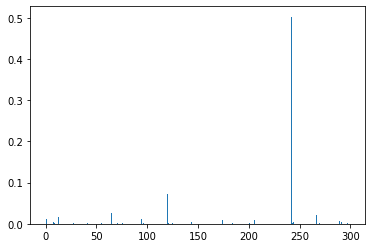

In [129]:
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [56]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsne_res = tsne.fit_transform(X_train[1:1000])

/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/rutwikk/anaconda3/envs/gensim/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [57]:
labels = y_train[1:1000]

done


<AxesSubplot:xlabel='tsne_firstD', ylabel='tsne_secondD'>

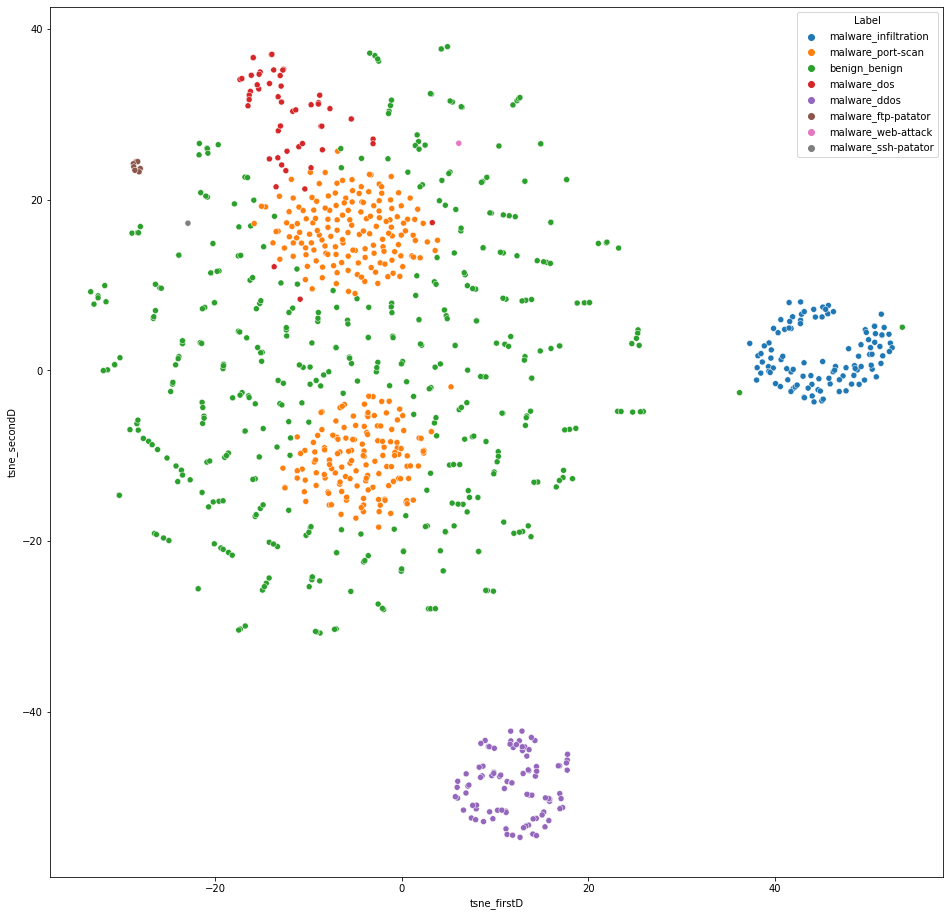

In [58]:
import seaborn as sns
print("done")
tsne_df = pd.DataFrame()
tsne_df['tsne_firstD'] = tsne_res[:,0]
tsne_df['tsne_secondD'] = tsne_res[:,1]
tsne_df['Label'] = labels
plt.figure(figsize=(16,16))
sns.scatterplot(
    x="tsne_firstD", y="tsne_secondD",
    data=tsne_df,
    hue="Label",
    legend="full"
)

In [22]:
import tensorflow as tf
import datetime
from tensorflow.keras.metrics import Recall,Precision
#%load_ext tensorboard

In [105]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(300,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(40, activation='tanh'),
    tf.keras.layers.Dense(21, activation='softmax')
])

In [106]:
optimizer = tf.keras.optimizers.Adam(lr=0.0001)

In [107]:
model.compile(optimizer=optimizer,
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [108]:
log_dir = os.path.join(
    "train_logs",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
)

# TF callback that sets up TensorBoard with training logs.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# TF callback that stops training when best value of validationi loss function is reached. It also
# restores weights from the best training iteration.
eary_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)

2022-05-29 00:41:49.981205: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-29 00:41:49.981265: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-05-29 00:41:49.981301: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.


In [109]:
training_df = pd.DataFrame()
training_df['Features'] = X_train
training_df['Labels'] = y_train

In [110]:
XX_train = np.array(X_train)
YY_train = np.array(y_train)
XX_test = np.array(X_test)
YY_test = np.array(y_test)

In [111]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight( class_weight= 'balanced',
                                                 classes=np.unique(YY_train),
                                                 y=YY_train)

In [112]:
class_weights

array([ 0.28363047,  1.60845588,  2.2264631 , 13.05970149,  1.07230392,
        0.42871142, 30.17241379, 35.        ])

In [113]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
LE.fit(YY_train)
YY_train1 = LE.transform(YY_train)
print(np.unique(YY_train1))
d = LE.inverse_transform(YY_train1)
d = pd.Series(d)
print(d.unique())

[0 1 2 3 4 5 6 7]
['benign_benign' 'malware_infiltration' 'malware_port-scan' 'malware_dos'
 'malware_ddos' 'malware_ftp-patator' 'malware_web-attack'
 'malware_ssh-patator']


In [114]:
YY_train1[1]

4

In [115]:
from sklearn.preprocessing import LabelEncoder
YY_test1 = LE.transform(YY_test)
print(np.unique(YY_test1))
d = LE.inverse_transform(YY_test1)
d = pd.Series(d)
print(d.unique())

[0 1 2 3 4 5 6 7]
['benign_benign' 'malware_infiltration' 'malware_port-scan' 'malware_ddos'
 'malware_dos' 'malware_web-attack' 'malware_ftp-patator'
 'malware_ssh-patator']


In [116]:
YY_test1[2998]

0

In [117]:
model.fit(XX_train,
          YY_train1,
          epochs=100,
          callbacks=[tensorboard_callback])

Epoch 1/100
128/219 [================>.............] - ETA: 0s - loss: 2.7547 - accuracy: 0.2571

2022-05-29 00:41:53.196395: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2022-05-29 00:41:53.196430: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2022-05-29 00:41:53.224047: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2022-05-29 00:41:53.225036: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2022-05-29 00:41:53.226172: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: train_logs/20220529-004149/train/plugins/profile/2022_05_29_00_41_53
2022-05-29 00:41:53.226952: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to train_logs/20220529-004149/train/plugins/profile/2022_05_29_00_41_53/biogpu.trace.json.gz
2022-05-29 00:41:53.228961: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: train_logs/20220529-004149/train/plugins

219/219 [==============================] - 1s 1ms/step - loss: 2.3832 - accuracy: 0.3788
Epoch 2/100
219/219 [==============================] - 0s 1ms/step - loss: 0.5993 - accuracy: 0.9082
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.2845 - accuracy: 0.9594
Epoch 4/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1879 - accuracy: 0.9713
Epoch 5/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1293 - accuracy: 0.9816
Epoch 6/100
219/219 [==============================] - 0s 2ms/step - loss: 0.0964 - accuracy: 0.9859
Epoch 7/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9888
Epoch 8/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0559 - accuracy: 0.9930
Epoch 9/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0480 - accuracy: 0.9942
Epoch 10/100
219/219 [==============================] - 0s 1ms/step - loss: 0.0358 - accuracy: 0.9972
E

Epoch 80/100
219/219 [==============================] - 0s 1ms/step - loss: 4.9649e-05 - accuracy: 1.0000
Epoch 81/100
219/219 [==============================] - 0s 1ms/step - loss: 4.1999e-05 - accuracy: 1.0000
Epoch 82/100
219/219 [==============================] - 0s 1ms/step - loss: 8.4108e-05 - accuracy: 1.0000
Epoch 83/100
219/219 [==============================] - 0s 1ms/step - loss: 3.3679e-05 - accuracy: 1.0000
Epoch 84/100
219/219 [==============================] - 0s 1ms/step - loss: 1.1189e-04 - accuracy: 1.0000
Epoch 85/100
219/219 [==============================] - 0s 1ms/step - loss: 5.0400e-05 - accuracy: 1.0000
Epoch 86/100
219/219 [==============================] - 0s 1ms/step - loss: 4.4016e-05 - accuracy: 1.0000
Epoch 87/100
219/219 [==============================] - 0s 1ms/step - loss: 6.8049e-05 - accuracy: 1.0000
Epoch 88/100
219/219 [==============================] - 0s 1ms/step - loss: 2.4967e-04 - accuracy: 1.0000
Epoch 89/100
219/219 [========================

In [118]:
# Evaluating model accuracy.
model.evaluate(XX_test, YY_test1, verbose=2)

94/94 - 0s - loss: 0.0503 - accuracy: 0.9947


[0.05030444264411926, 0.9946666955947876]

In [119]:
model.save('saved_models/IDS_real_model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5')

In [120]:
def pred_X(Y):
    y_pred = []
    for i in range(len(Y)):
        max_value = max(Y[i])
        max_index = np.where(Y[i] == max_value)
        y_pred.append(max_index[0][0])
    
    return np.array(y_pred)



In [121]:
from sklearn import metrics
predicted = model.predict(XX_test)
pred_np = pred_X(predicted)

In [122]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(YY_test1, pred_np)}\n"
)

Classification report for classifier <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fc0dfd48dd0>:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1324
           1       1.00      1.00      1.00       272
           2       0.98      1.00      0.99       145
           3       1.00      1.00      1.00        27
           4       0.99      0.97      0.98       372
           5       1.00      1.00      1.00       838
           6       1.00      1.00      1.00        13
           7       1.00      0.78      0.88         9

    accuracy                           0.99      3000
   macro avg       1.00      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000




In [123]:
print(np.mean(YY_test1 == pred_np))

0.9946666666666667


In [124]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(YY_test1, pred_np)

print(cf_matrix)

[[1322    0    0    0    2    0    0    0]
 [   0  272    0    0    0    0    0    0]
 [   0    0  145    0    0    0    0    0]
 [   0    0    0   27    0    0    0    0]
 [  11    0    0    0  361    0    0    0]
 [   0    0    1    0    0  837    0    0]
 [   0    0    0    0    0    0   13    0]
 [   0    0    2    0    0    0    0    7]]


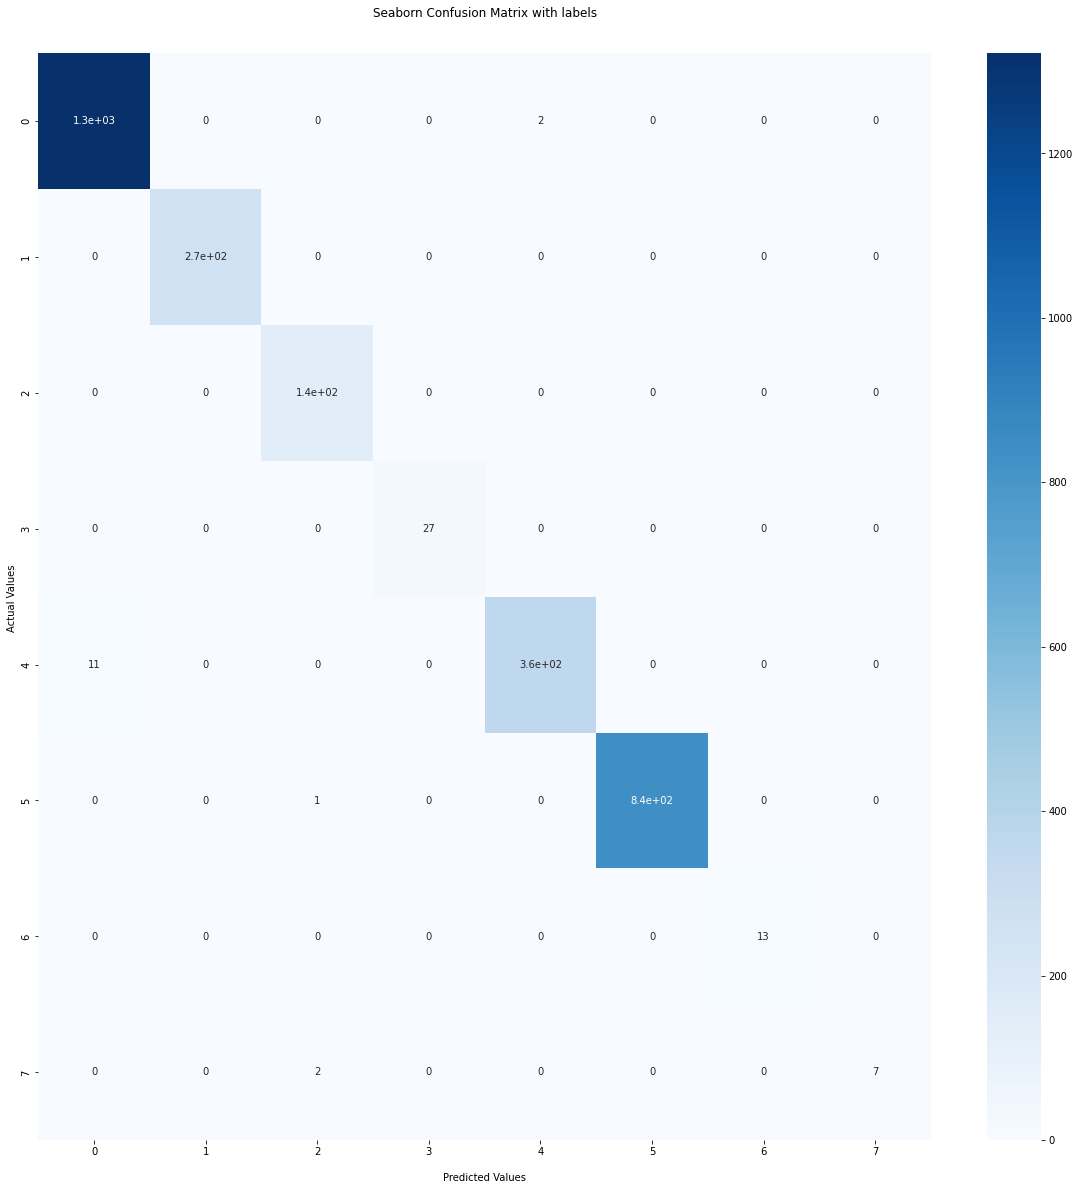

In [125]:
import seaborn as sns
plt.figure(figsize=(20,20))

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [104]:
!pip install imblearn
!pip install scikit-learn

In [312]:
#Let us try some sampling technique to remove class imbalance
from imblearn.over_sampling import SMOTE
#Over-sampling: SMOTE
#SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, 
#based on those that already exist. It works randomly picking a point from the minority class and computing 
#the k-nearest neighbors for this point.The synthetic points are added between the chosen point and its neighbors.
#We'll use ratio='minority' to resample the minority class.
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(XX_train, YY_train)
print('Resampled dataset shape %s' % Counter(y_res))

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (/home/rutwikk/anaconda3/envs/nprintml/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [309]:
!pip install --upgrade scikit-learn


In [315]:
!conda install -c conda-forge -y imbalanced-learn


Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::frozenlist==1.2.0=py37h7f8727e_0
  - defaults/noarch::typing-extensions==4.1.1=hd3eb1b0_0
  - defaults/linux-64::numpy-base==1.21.5=py37hf524024_2
  - defaults/linux-64::pyjwt==2.1.0=py37h06a4308_0
  - defaults/linux-64::ncurses==6.3=h7f8727e_2
  - defaults/noarch::cached-property==1.5.2=py_0
  - defaults/linux-64::zlib==1.2.12=h7f8727e_2
  - defaults/linux-64::python==3.7.13=h12debd9_0
  - defaults/linux-64::tk==8.6.11=h1ccaba5_1
  - defaults/noarch::google-auth-oauthlib==0.4.1=py_2
  - defaults/noarch::pyasn1-modules==0.2.8=py_0
  - defaults/linux-64::setuptools==61.2.0=py37h06a4308_0
  - defaults/noarch::absl-py==0.15.0=pyhd3eb1b0_0
  - defaults/linux-64::giflib==5.2.1=h7b6447c_0
  - defaults/linux-64::aiohttp==3.8.1=py37h7f8727e_1
  - defaults/linux-64::cffi==1.15.0=py37hd667e15_1
  - defaults/linux-64::hdf5==

In [340]:
!pip uninstall -y imblearn

In [326]:
!pip uninstall -y -v scikit-learn

!pip install -v scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Removing file or directory /home/rutwikk/anaconda3/envs/nprintml/lib/python3.7/site-packages/scikit_learn-1.0.2.dist-info/
  Removing file or directory /home/rutwikk/anaconda3/envs/nprintml/lib/python3.7/site-packages/sklearn/
  Successfully uninstalled scikit-learn-1.0.2
Using pip 21.2.2 from /home/rutwikk/anaconda3/envs/nprintml/lib/python3.7/site-packages/pip (python 3.7)
  Link requires a different Python (3.7.13 not in: '>=3.8'): https://files.pythonhosted.org/packages/cf/94/7b05e4880cb2403960fb5fb3651b886606b72c002fdae42a49d6966b95ba/scikit-learn-1.1.0rc1.tar.gz#sha256=f5b27a76d10d2673f7a899622d396eb5813fdbc7c05ca817bdd90121113e6555 (from https://pypi.org/simple/scikit-learn/) (requires-python:>=3.8)
  Link requires a different Python (3.7.13 not in: '>=3.8'): https://files.pythonhosted.org/packages/8b/99/b1ec652f2d60a13871a3053f312f9d78977be57e420f2a49d52ba503f1f4/scikit-learn-1.1.0.tar.gz#sha256=

In [336]:
from sklearn.manifold import TSNE
tsnetest = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=1000)
tsnetest_res = tsne.fit_transform(X_test[1:1000])

ImportError: cannot import name 'DistanceMetric' from 'sklearn.metrics' (/home/rutwikk/anaconda3/envs/nprintml/lib/python3.7/site-packages/sklearn/metrics/__init__.py)

In [339]:
pip install  scikit-learn==0.24

  Using cached scikit_learn-0.24.0-cp37-cp37m-manylinux2010_x86_64.whl (22.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.0 which is incompatible.
autogluon-vision 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-text 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-tabular 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-mxnet 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-features 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-extra 0.1.0 requires numpy==1.19.5, but you have numpy 1.21.6 which is incompatible.
autogluon-core 0.1.0 requires numpy==1.19.5, but you have nu